In [12]:
#Standard Header used on the projects

#first the major packages used for math and graphing
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler
import scipy.special as sp

#Custome graph format style sheet
plt.style.use('Prospectus.mplstyle')

#If being run by a seperate file, use the seperate file's graph format and saving paramaeters
#otherwise set what is needed
if not 'Saving' in locals():
    Saving = False
if not 'Titles' in locals():
    Titles = True
if not 'Ledgends' in locals():
    Ledgends = True
if not 'FFormat' in locals():
    FFormat = '.eps'
if not 'location' in locals():
    #save location.  First one is for running on home PC, second for running on the work laptop.  May need to make a global change
    location = 'E:\\Documents\\Dan\\Code\\FigsAndPlots\\FigsAndPlotsDocument\\Figures\\'
    #location = 'C:\\Users\\dhendrickson\\Documents\\github\\FigsAndPlots\\FigsAndPlotsDocument\\Figures\\'

my_cmap = plt.get_cmap('gray')
#Standard cycle for collors and line styles
default_cycler = (cycler('color', ['0.00', '0.40', '0.60', '0.70']) + cycler(linestyle=['-', '--', ':', '-.']))
plt.rc('axes', prop_cycle=default_cycler)

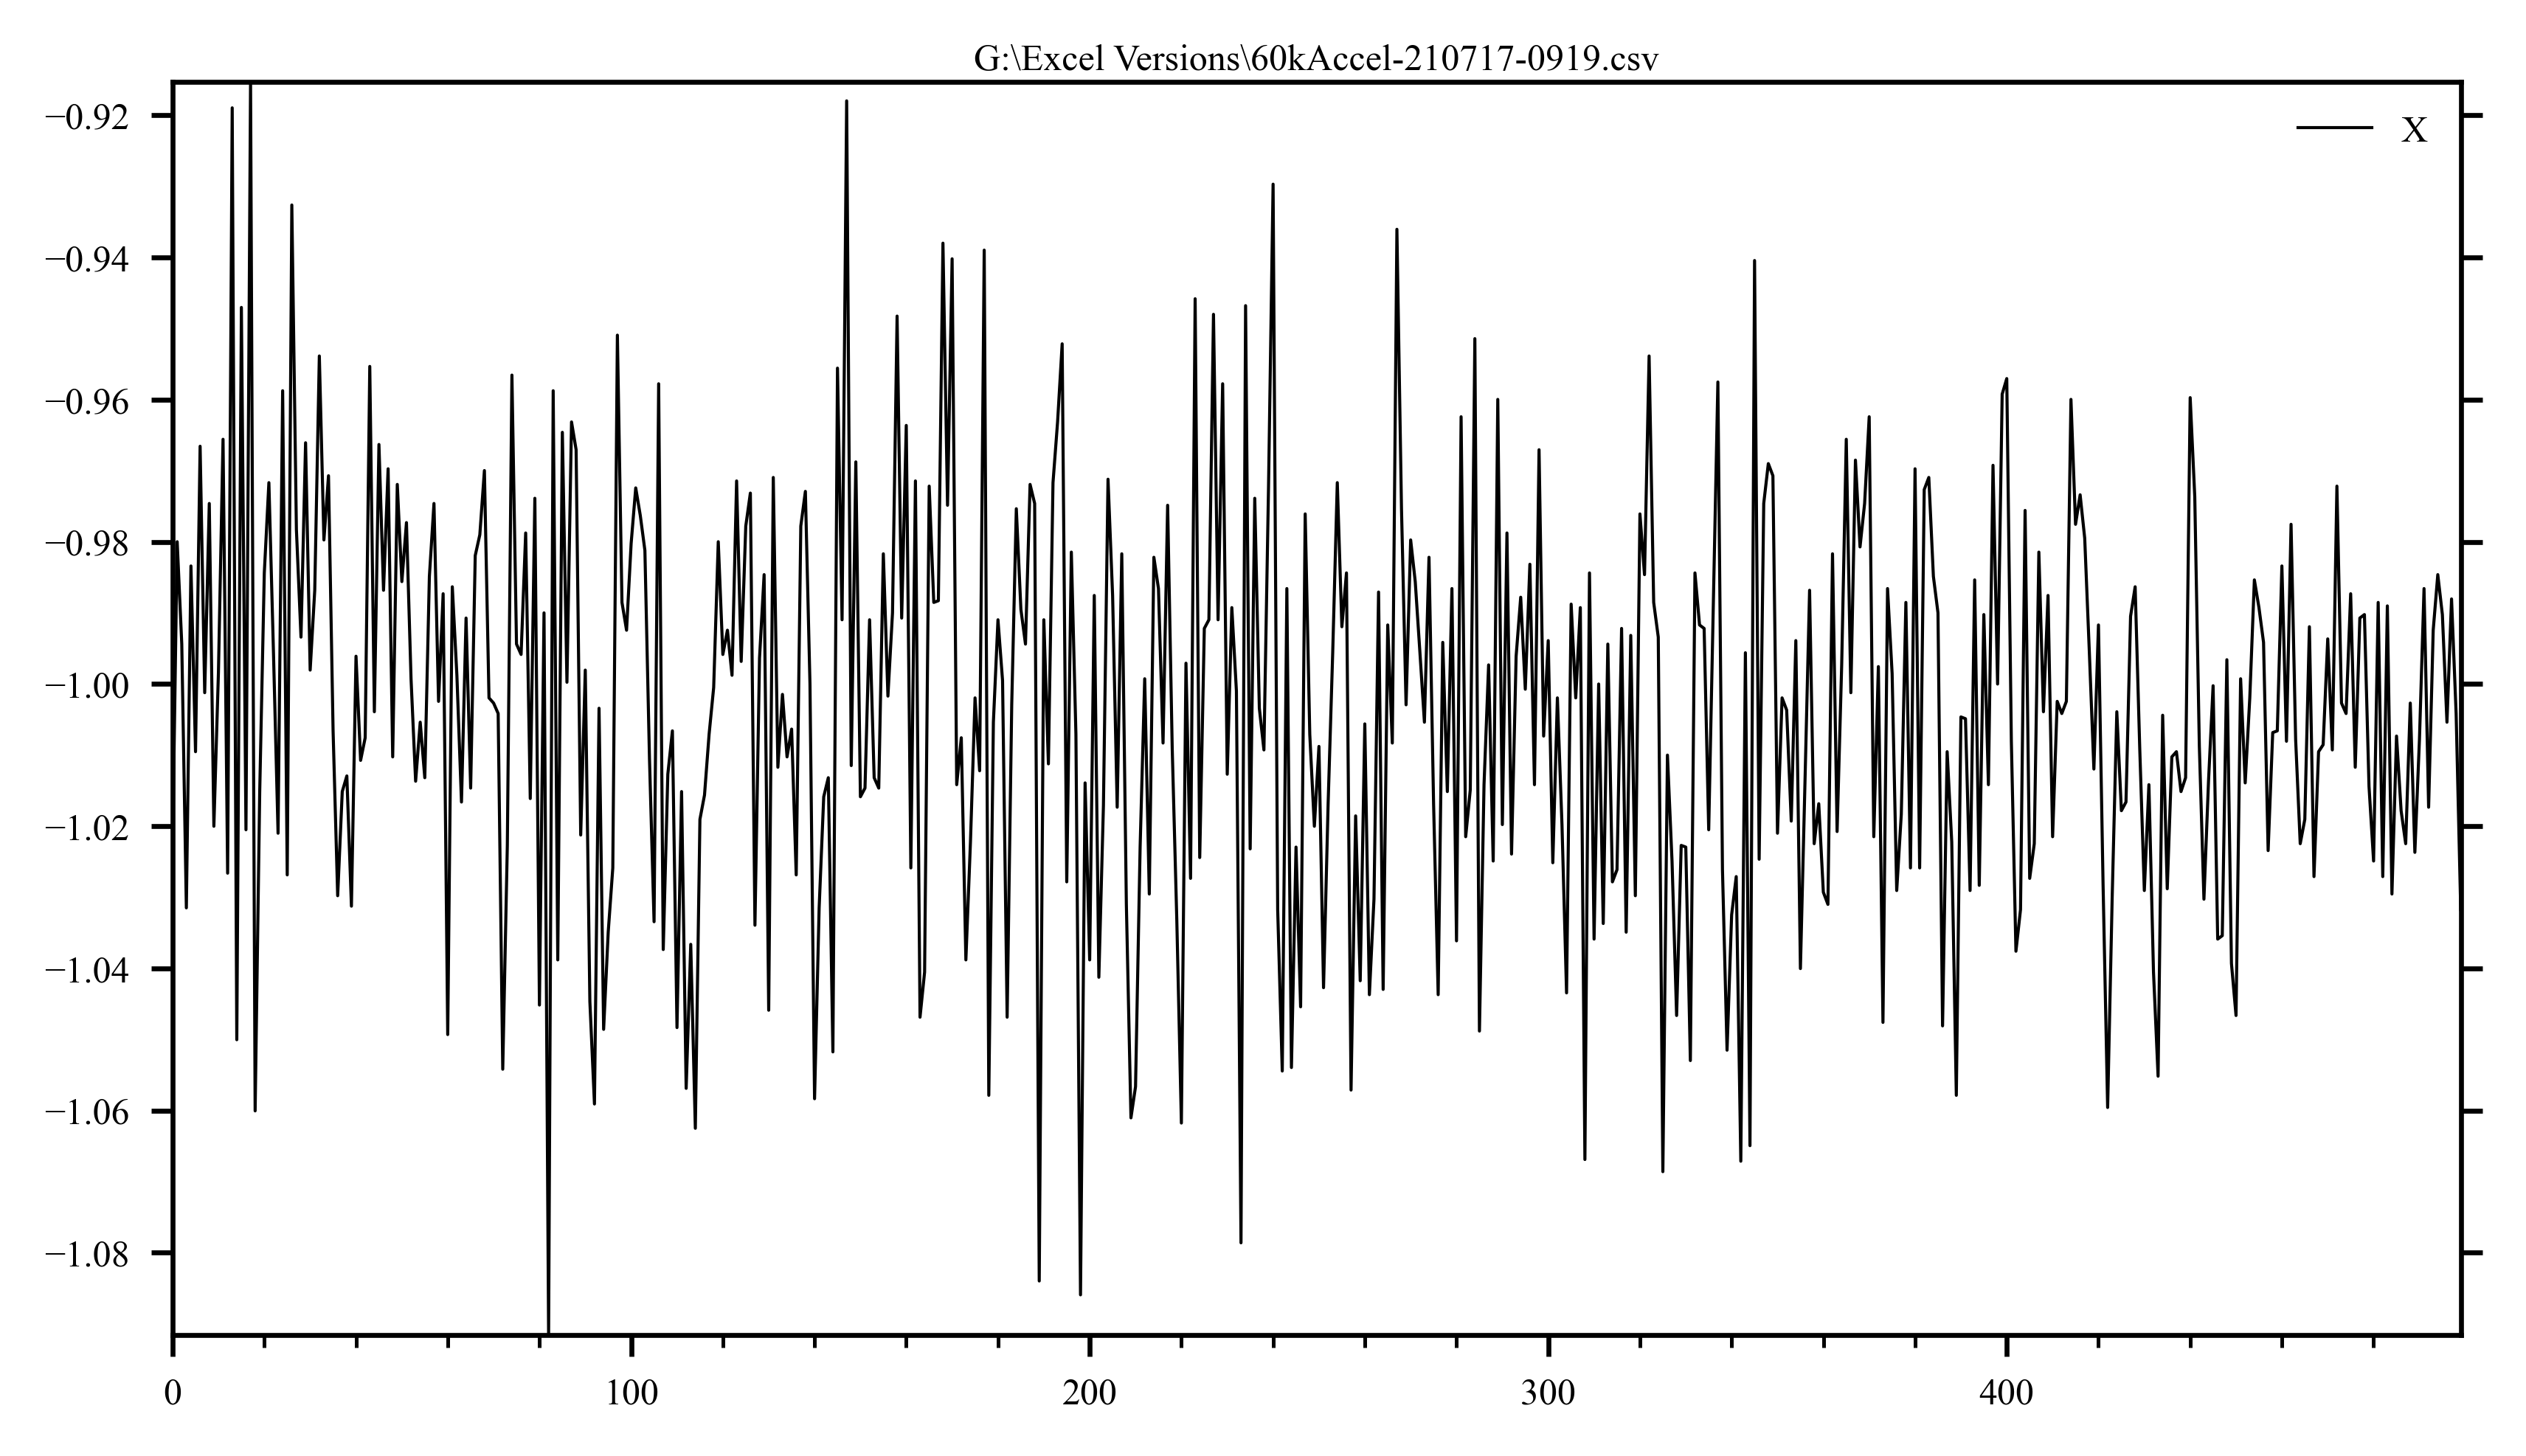

In [38]:
#Files = "G:\\Excel Versions\\60kAccel-210811-1837.csv"
Files = "G:\\Excel Versions\\60kAccel-210717-0919.csv"
DataSet = np.genfromtxt(open(Files,'r'), delimiter=',')

DataSet = DataSet[:,1:5]

coord = 3
start = 26750
end = 27250 #np.shape(DataSet)[0]

fig=plt.figure(figsize=(6.67,3.75))
#plt.plot(DataSet[:,0],DataSet[:,1], label = 'X')
#plt.plot(DataSet[:,0],DataSet[:,2], label = 'Y')
plt.plot(DataSet[start:end,coord], label = 'X')

title = Files

if Ledgends: plt.legend()
if Titles: plt.title(title)
if Saving: plt.savefig(location+title.replace(" ", "").replace(":", "").replace(",", "")+FFormat)
plt.show()


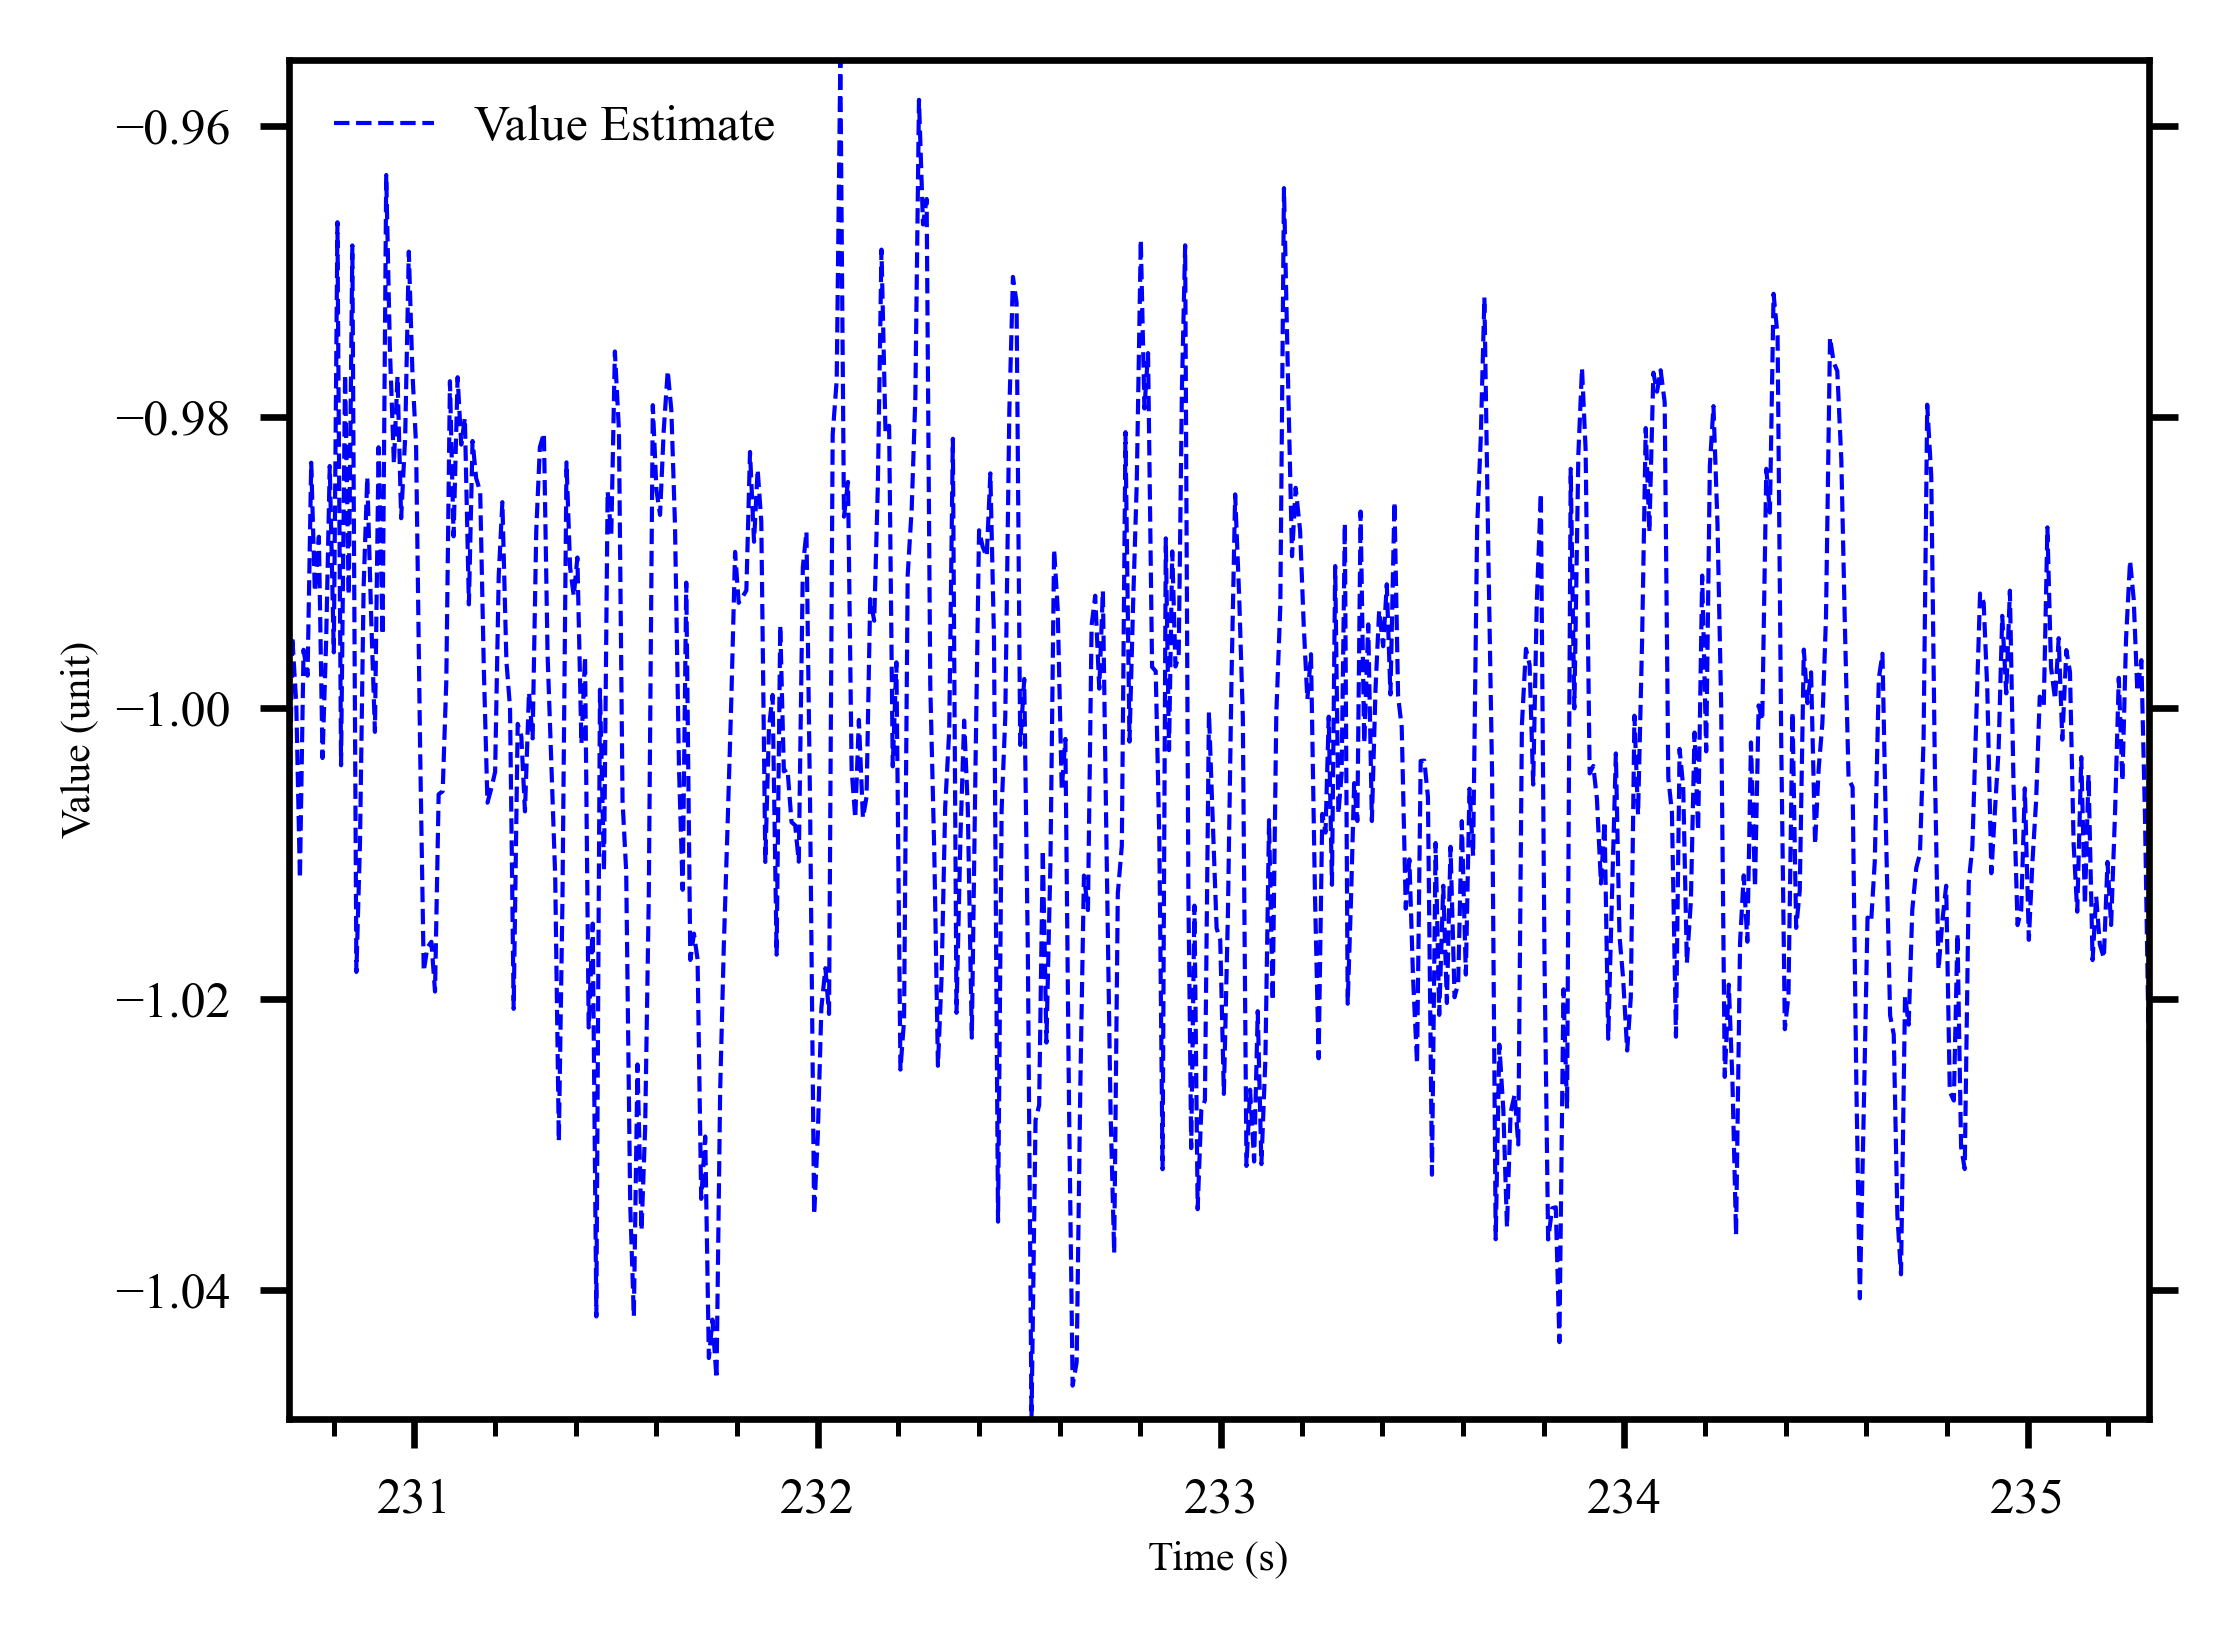

In [43]:
from pykalman import KalmanFilter
import copy

outlier_thresh = 0.75

# Treat y as position, and that y-dot is
# an unobserved state - the velocity,
# which is modelled as changing slowly (inertia)

# state vector [y,
#               y_dot]

# transition_matrix =  [[1, dt],
#                       [0, 1]]

observation_matrix = np.asarray([[1, 0]])

# observations:
t = np.transpose(DataSet[start:end,0])

# dt betweeen observations:
dt = [np.mean(np.diff(t))] + list(np.diff(t))
transition_matrices = np.asarray([[[1, each_dt],[0, 1]]
                                    for each_dt in dt])

# observations
y = (np.asarray(DataSet[start:end,3]))

y = np.ma.array(y)


#leave_1_out_cov = []

for i in range(len(y)):
    y_masked = np.ma.array(copy.deepcopy(y))
    y_masked[i] = np.ma.masked

    kf1 = KalmanFilter(transition_matrices = transition_matrices,
                   observation_matrices = observation_matrix)

    kf1 = kf1.em(y_masked)

    leave_1_out_cov.append(kf1.observation_covariance[0,0])

# Find indexes that contributed excessively to observation covariance
outliers = (leave_1_out_cov / np.mean(leave_1_out_cov)) < outlier_thresh

for i in range(len(outliers)):
    if outliers[i]:
        y[i] = np.ma.masked


kf1 = KalmanFilter(transition_matrices = transition_matrices,
                   observation_matrices = observation_matrix)

kf1 = kf1.em(y)

(smoothed_state_means, smoothed_state_covariances) = kf1.smooth(y)


plt.figure()
#plt.plot(t, y, '-', label="Observations")
plt.plot(t, smoothed_state_means[:,0], 'b--', label="Value Estimate" )
plt.legend(loc="upper left")
plt.xlabel("Time (s)")
plt.ylabel("Value (unit)")

plt.show()

Text(0, 0.5, 'Value (unit)')

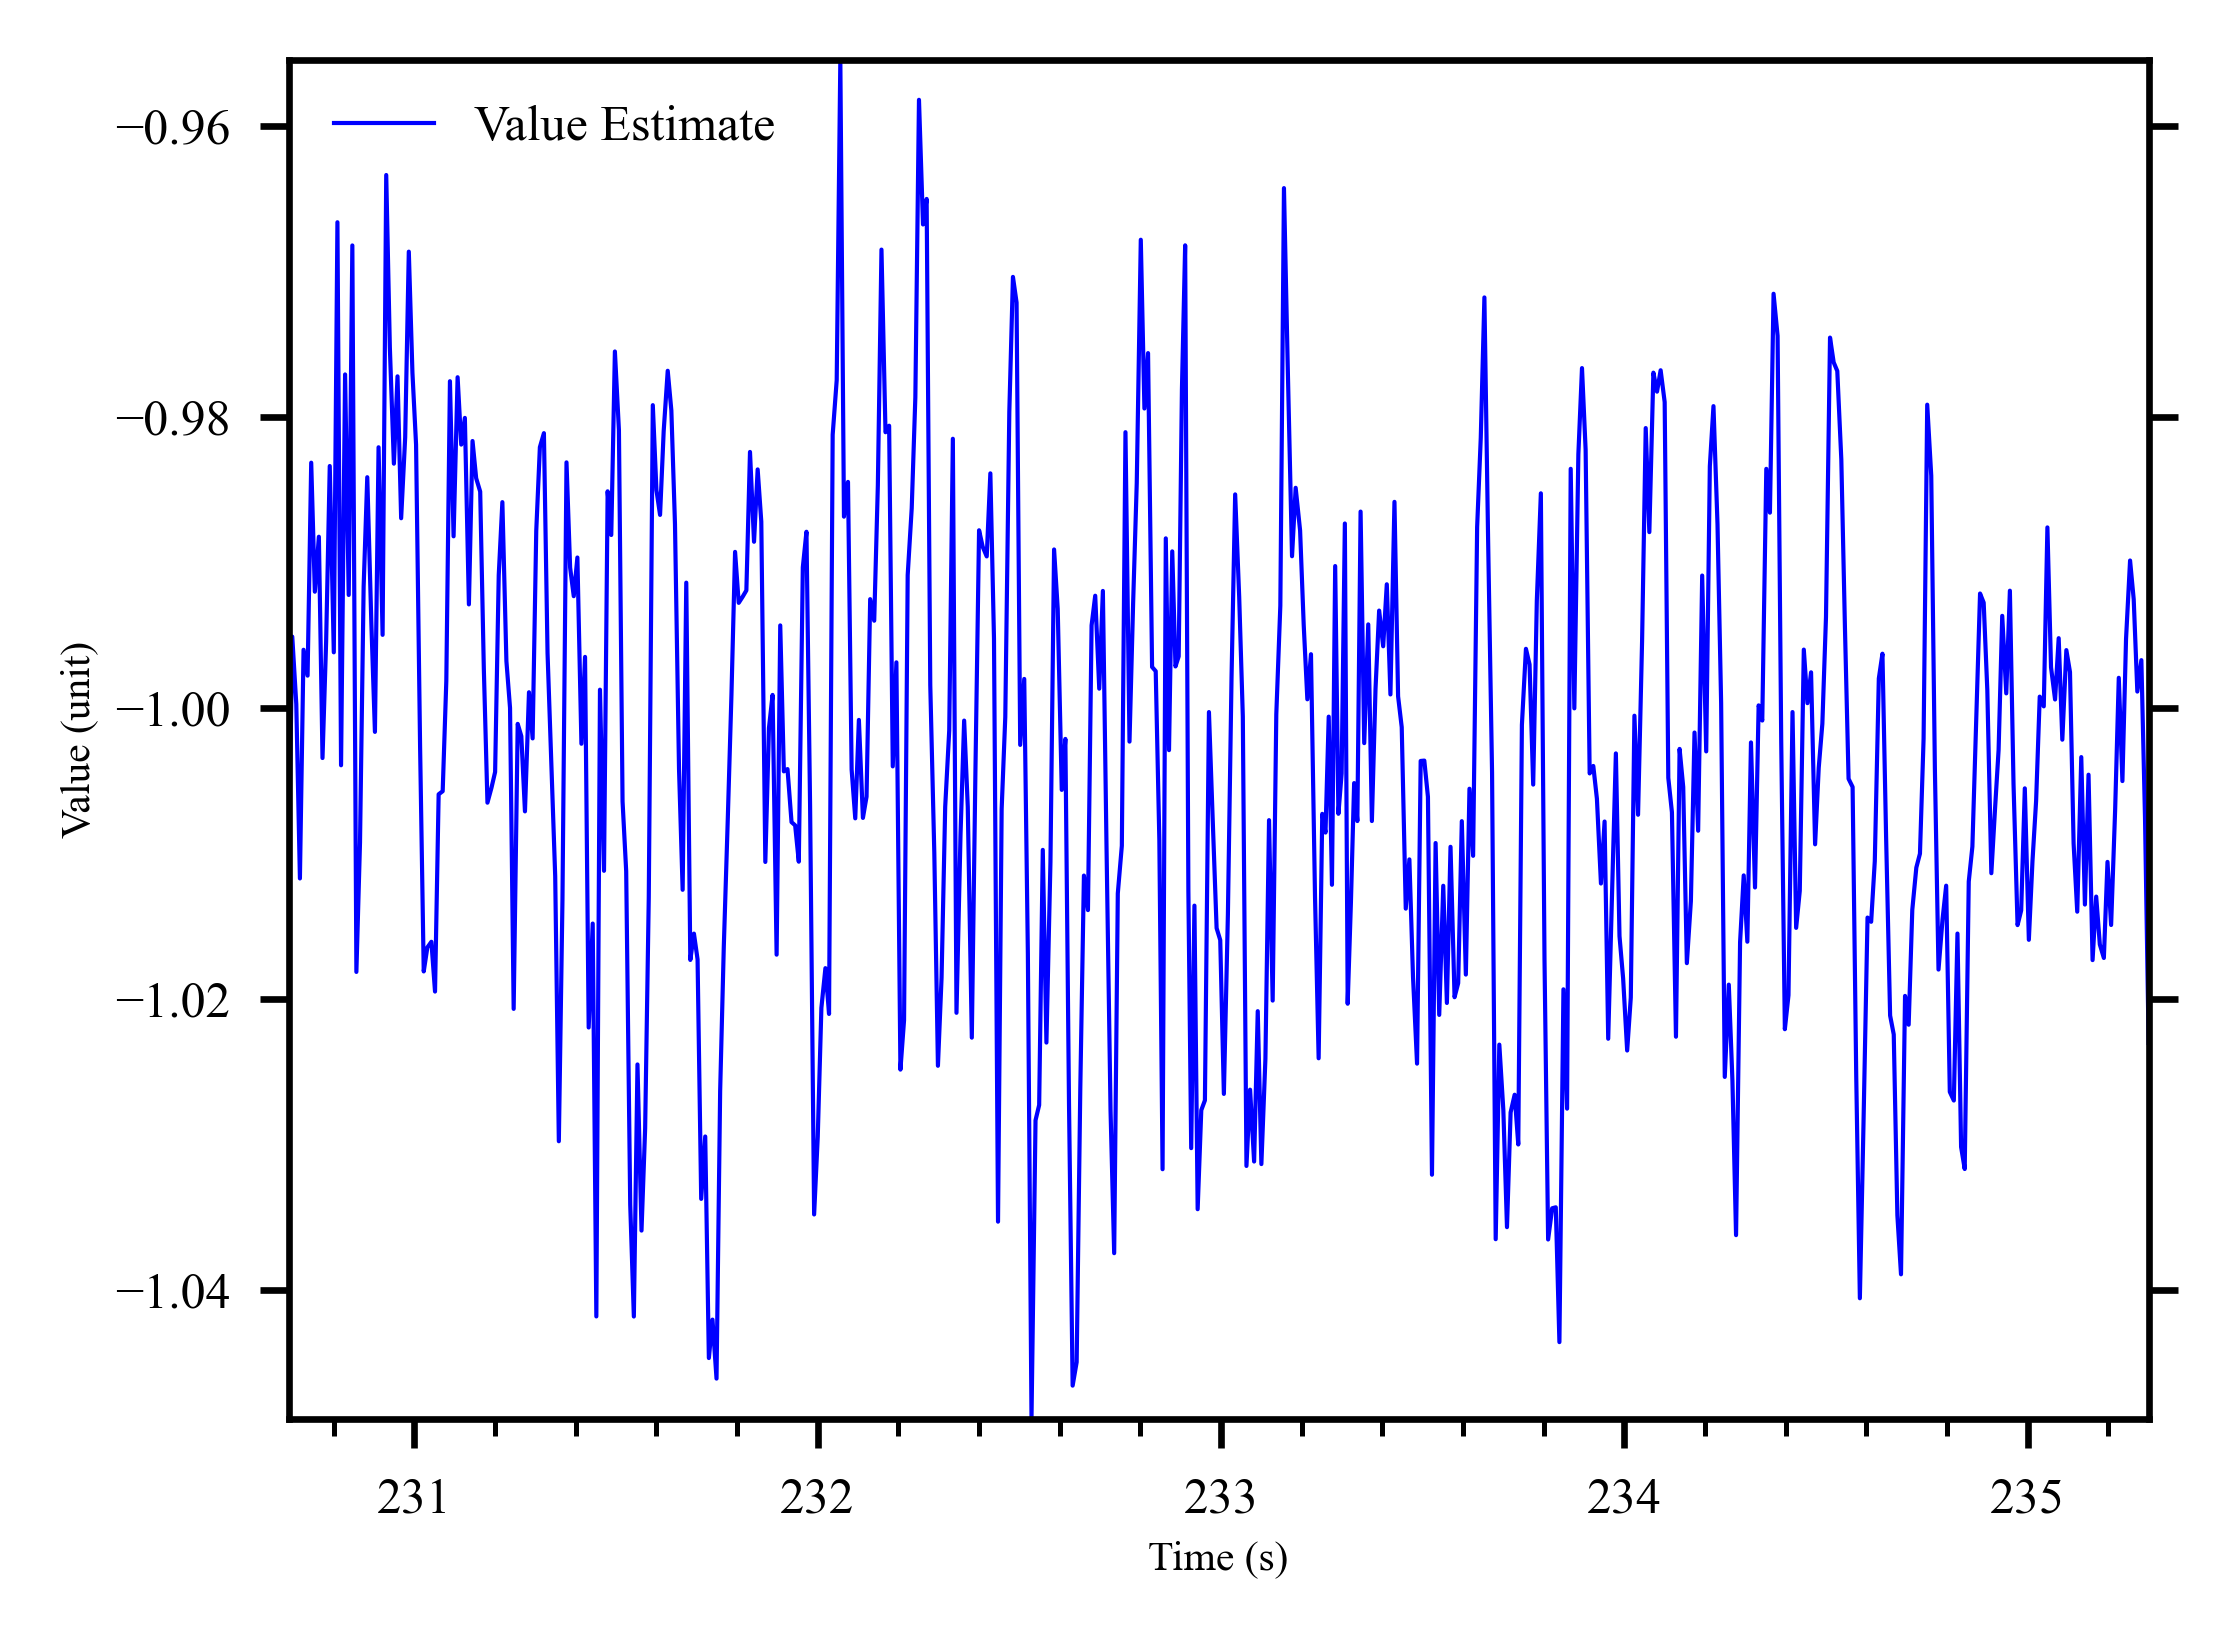

In [44]:
plt.figure()
#plt.plot(t, y, '-', label="Observations")
plt.plot(t, smoothed_state_means[:,0], 'b-', label="Value Estimate" )
plt.legend(loc="upper left")
plt.xlabel("Time (s)")
plt.ylabel("Value (unit)")
